In [1]:
%matplotlib inline

import numpy as np
from numpy import pi, r_
import matplotlib.pyplot as plt
from scipy import optimize

# Generate data points with noise
num_points = 150
Tx = np.linspace(5., 8., num_points)
Ty = Tx

tX = 11.86*np.cos(2*pi/0.81*Tx-1.32) + 0.64*Tx+4*((0.5-np.random.rand(num_points))*np.exp(2*np.random.rand(num_points)**2))
tY = -32.14*np.cos(2*np.pi/0.8*Ty-1.94) + 0.15*Ty+7*((0.5-np.random.rand(num_points))*np.exp(2*np.random.rand(num_points)**2))


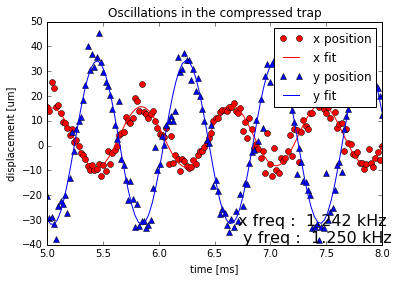

In [2]:
# Fit the first set
fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*x # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [-15., 0.8, 0., -1.] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(Tx, tX))

time = np.linspace(Tx.min(), Tx.max(), 100)
plt.plot(Tx, tX, "ro", time, fitfunc(p1, time), "r-") # Plot of the data and the fit

# Fit the second set
p0 = [-15., 0.8, 0., -1.]
p2,success = optimize.leastsq(errfunc, p0[:], args=(Ty, tY))

time = np.linspace(Ty.min(), Ty.max(), 100)
plt.plot(Ty, tY, "b^", time, fitfunc(p2, time), "b-")

# Legend the plot
plt.title("Oscillations in the compressed trap")
plt.xlabel("time [ms]")
plt.ylabel("displacement [um]")
plt.legend(('x position', 'x fit', 'y position', 'y fit'))

ax = plt.axes()

plt.text(0.8, 0.07,
         'x freq :  %.3f kHz \n y freq :  %.3f kHz' % (1/p1[1],1/p2[1]),
         fontsize=16,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes)

plt.show()